In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

n_dots = 20

# [0, 1] 之间创建 20 个点
x = np.linspace(0, 1, n_dots)                   
y = np.sqrt(x) + 0.2 * np.random.rand(n_dots) - 0.1

In [6]:
def plot_polynomial_fit(x, y, order):
    """
    order 表示自由度
    """
    p = np.poly1d(np.polyfit(x, y, order))

    # 画出拟合出来的多项式所表达的曲线以及原始的点
    t = np.linspace(0, 1, 200)
    plt.plot(x, y, 'ro', t, p(t), '-', t, np.sqrt(t), 'r--')
    return p

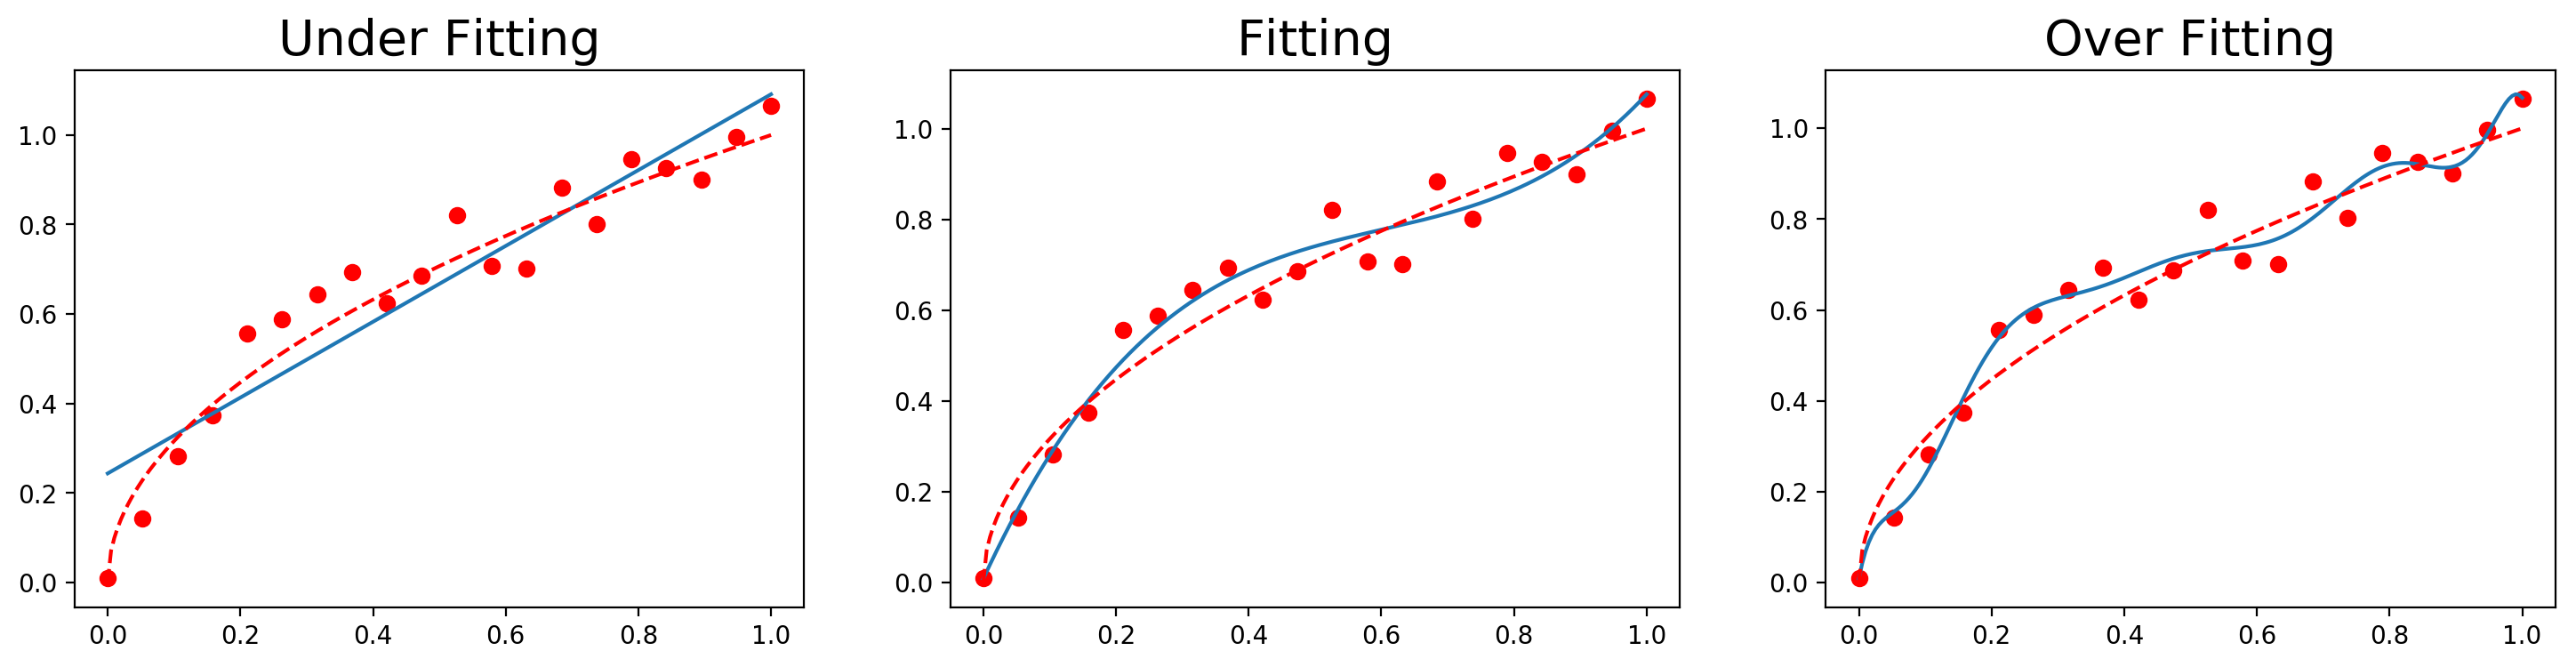

In [7]:
plt.figure(figsize=(18, 4), dpi=100)
titles = ['Under Fitting', 'Fitting', 'Over Fitting']
models = [None, None, None]
for index, order in enumerate([1, 3, 10]):
    plt.subplot(1, 3, index + 1)
    models[index] = plot_polynomial_fit(x, y, order)
    plt.title(titles[index], fontsize=20)
plt.show()

In [8]:
for m in models:
    print('model coeffs: {0}'.format(m.coeffs))

model coeffs: [0.84709671 0.24396874]
model coeffs: [ 2.59616584 -4.68941464  3.16040832  0.00838483]
model coeffs: [-1.26798771e+04  6.36236815e+04 -1.35939264e+05  1.61257301e+05
 -1.16026895e+05  5.18742932e+04 -1.41464276e+04  2.20326022e+03
 -1.72487222e+02  7.47362836e+00  8.85219527e-03]


Text(-90, -50, 'L2: $y = 0.2439687385679747 + 0.8470967078980062x$')

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


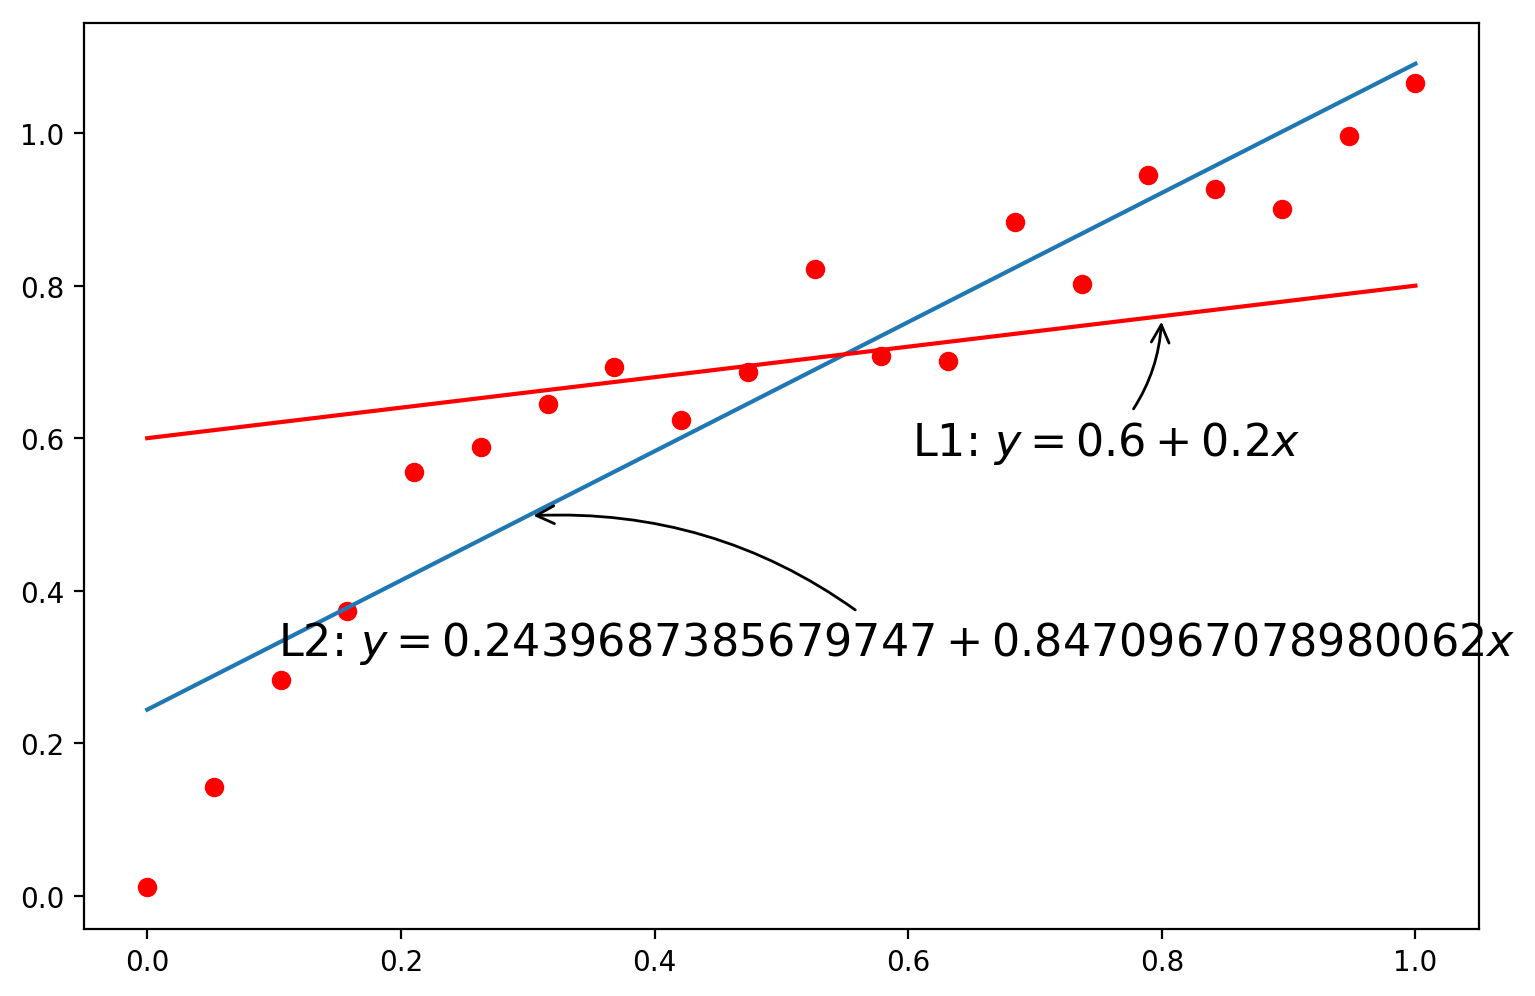

In [9]:
# 针对一阶多项式的模型，不同的参数拟合出来的直线和训练样本对应的位置关系
coeffs_1d = [0.2, 0.6]

plt.figure(figsize=(9, 6), dpi=100)
t = np.linspace(0, 1, 200)
plt.plot(x, y, 'ro', t, models[0](t), '-', t, np.poly1d(coeffs_1d)(t), 'r-')
plt.annotate(r'L1: $y = {1} + {0}x$'.format(coeffs_1d[0], coeffs_1d[1]),
             xy=(0.8, np.poly1d(coeffs_1d)(0.8)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'L2: $y = {1} + {0}x$'.format(models[0].coeffs[0], models[0].coeffs[1]),
             xy=(0.3, models[0](0.3)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))